## Безусловная оптимизация. Методы 0-го порядка. Метод Нелдера-Мида (деформируемого многогранника)

In [19]:
import numpy as np
np.printoptions(precision=3)
import matplotlib.pyplot as plt

from scipy import optimize
# from cost_functions import mk_quad, mk_gauss, rosenbrock, rosenbrock_prime, rosenbrock_hessian, LoggingFunction, CountingFunction

### **Оптимизируемые функции**

1. "Хорошая" эллиптическая функция
$$f1(x,y) = x^2 + 4*y^2$$
$$ (x^*, y^*) = (0,0)$$

2. Плохо обусловленная эллиптическая функция

$$f2(x,y) = x^2 + 100*y^4$$
$$ (x^*, y^*) = (0,0)$$

3. Функция с криволинейным оврагом. Функция Розенброка
$$f3(x,y) = (1-x)^2 + 10*(y-x^2)^2$$
$$ (x^*, y^*) = (1,1)$$

4. Функция многоэкстремальная
$$ f4(x,y) = (x^2 + y - 11)^2 + (x+y^2 - 7)^2 $$

----------------

In [ ]:
def f1(x):   # Good fun
    return x[0]**2 + 4*x[1]**2

def f2(x):   # Bad cond
    return x[0]**2 + 100*x[1]**4

def f3(x):   # The rosenbrock function
    return (1 - x[0])**2 + 10*(x[1] - x[0]**2)**2

def f4(x):   # Bad cond
    return (x[0]**2 + x[1] -11)**2 + (x[0] + x[1]**2 - 7)**2

#### **Метод Нелдера и Мида**

In [37]:
# выбираем фукнцию для оптимизации
f = f3
# начальную точку
r0 = np.array([-10.0, 10.0])

In [21]:
# функция создания правильного многогранника/симплекса с точкой в x0 и размером R
def regSimplex(x0, R):
    points = [x0]
    for i in range(len(x0)):
        x = x0.copy()
        dx = np.zeros(len(x))
        dx[i] = R
        x += dx
        points.append(x)
    return np.array(points)

pts = regSimplex(r0, R=1)
print(pts)
fs = f(pts.T)
fs

[[-10.  10.]
 [ -9.  10.]
 [-10.  11.]]


array([500., 481., 584.])

In [30]:
# функция для запоминания промежуточных точек оптимизации
def store(r):
  x, y = r
  all_x_i.append(x)
  all_y_i.append(y)
  all_f_i.append(f(r))


In [38]:
# Выполним оптимизацию методом Нелдера и Мида
all_x_i = [r0[0]]
all_y_i = [r0[1]]
all_f_i = [f(r0)]

res = optimize.minimize(f, x0=r0, method='Nelder-Mead', callback=store)
print(res)
for ii in range(0,min(len(all_f_i), 51),5):
  ff = all_f_i[ii]
  print("ii={:d}, f(ii)={:10.7f}".format(ii, ff))

 final_simplex: (array([[0.99999663, 0.99998647],
       [1.00002761, 1.00005757],
       [0.99996975, 0.99993981]]), array([4.71487167e-10, 8.17710357e-10, 9.16252969e-10]))
           fun: 4.714871669377551e-10
       message: 'Optimization terminated successfully.'
          nfev: 177
           nit: 95
        status: 0
       success: True
             x: array([0.99999663, 0.99998647])
ii=0, f(ii)=81121.0000000
ii=5, f(ii)=43.0844727
ii=10, f(ii)=43.0844727
ii=15, f(ii)=24.5936730
ii=20, f(ii)=23.4797019
ii=25, f(ii)=19.5853596
ii=30, f(ii)=11.1703293
ii=35, f(ii)= 7.6270170
ii=40, f(ii)= 5.4058209
ii=45, f(ii)= 4.1211282
ii=50, f(ii)= 2.0200167


Визуализируем функцию и процесс оптимизации

In [39]:
# определим границы визуализации
x_min, x_max = min(all_x_i)-1, max(all_x_i)+1
y_min, y_max = min(all_y_i)-1, max(all_y_i)+1

# сформируем сетку узлов
x, y = np.mgrid[x_min:x_max:100j, y_min:y_max:100j]
x = x.T
y = y.T

In [40]:
# подготовим точки для визуализации линий уровня функции
X = np.concatenate((x[np.newaxis, ...], y[np.newaxis, ...]), axis=0)
z = np.apply_along_axis(f, 0, X)
log_z = np.log(z + .01)

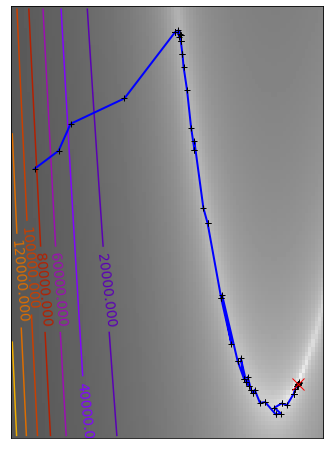

In [41]:
# нарисуем все это
plt.figure(figsize=(8, 6))
plt.clf()
plt.axes([0, 0, 1, 1])

# -------- рисуем фон ----------
''''''
plt.imshow(log_z,
           extent=[x_min, x_max, y_min, y_max],
           cmap=plt.cm.gray_r, origin='lower',
           vmax=log_z.min() + 1.5*log_z.ptp())
''''''
# Рисуем линии уровня фукнции
contours = plt.contour(z,
                       extent=[x_min, x_max, y_min, y_max],
                       cmap=plt.cm.gnuplot, origin='lower')
plt.clabel(contours, inline=1, fontsize=14)

# нарисуем след работы метода
plt.plot(all_x_i, all_y_i, 'b-', linewidth=2)
plt.plot(all_x_i, all_y_i, 'k+')

# выделим точное решение задачи
plt.plot([1.0], [1.0], 'rx', markersize=12)

plt.xticks(())
plt.yticks(())
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.draw()


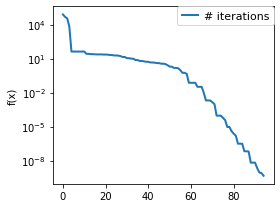

In [42]:
# Посмотрим как уменьшалось значение функции в зависимости от итерации
plt.figure(150, figsize=(4, 3))
plt.clf()
plt.semilogy(np.maximum(all_f_i, 1e-30), linewidth=2, label='# iterations')
plt.ylabel('f(x)')
plt.legend(loc='upper right', frameon=True, prop=dict(size=11),
           borderaxespad=0, handlelength=1.5, handletextpad=.5)
plt.tight_layout()
plt.draw()

--------------------------

## **ВОПРОС 1.**
Пусть минимизируется функция
$$f1(x,y) = x^2 + 4*y^2$$

И пусть построен симплекс с вершинами

$\begin{pmatrix}
  -10 & 10 \\
  -9 & 10 \\
  -10 & 11 \\
 \end{pmatrix}$

Значения функции в этих вершинах равны соответственно:

$$array([500., 481., 584.])$$

Определите координаты новой вершины симплекса после одной итерации.
Учесть, что при удачном шаге - шаг увеличивается вдвое и из этих двух шагов выбирается наилучший результат.


### **ОТВЕТЫ**:
​
### **A.** $(-9.5, 10)$
### **B.** $(-9.0, 10)$
### **C.** $(-9.0, 9.0)$
### **D.** $(-8.5, 8.0)$

-----------------------------------------------------

In [45]:
Xsimplex = np.array([[-10.0,  10.0], [ -9.0,  10.], [-10.,  11.]])
Xsimplex
x_bad = Xsimplex[2]
print(x_bad)
x_center = (Xsimplex[0] + Xsimplex[1])/2
x_center

[-10.  11.]


array([-9.5, 10. ])

In [48]:
x1 = x_center + (x_center - x_bad)
print(x1)
f1(x1)

[-9.  9.]


405.0

In [49]:
x2 = x_center + 2*(x_center - x_bad)
print(x2)
f1(x2)

[-8.5  8. ]


328.25